## Build Convolutional Neural Network from Scratch
* 2 Convolution Layers (Followed by ReLU)
* 2 Max Pooling Layers
* 3 Fully Connected Layers

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F # provides activation functions and functions for tasks like pooling, normalization, and convolution layers, etc.

In [12]:
# Define CNN architecture
class CNN(nn.Module): # nn.Module is the base class for all neural network modules in PyTorch
 def __init__(self):
  # initialize the class as a subclass of nn.Module
  super(CNN, self).__init__()
  
  # first convolutional layer
  self.conv1 = nn.Conv2d(3, 6, 5) # input channels = 3, output channels = 6, kernel size = 5 (5x5 filter)
  
  # first max pooling layer
  self.pool1 = nn.MaxPool2d(2, 2) # kernel size = 2, stride = 2
  
  # second convolutional layer
  self.conv2 = nn.Conv2d(6, 16, 5) # input channels = 6, output channels = 16, kernel size = 5 (5x5 filter)
  
  # second max pooling layer
  self.pool2 = nn.MaxPool2d(2, 2) # kernel size = 2, stride = 2
  
  # 3 fully connected layers
  # linear transformation from 16*5*5 to 120
  self.fc1 = nn.Linear(16 * 5 * 5, 120) # flatten the input, 16*5*5 input features, 120 output features
  
  # linear transformation from 120 to 84-dimensional space
  self.fc2 = nn.Linear(120, 84) # 120 input features, 84 output features
  
  # linear transformation from 84 to 10-dimensional space (output classes)
  self.fc3 = nn.Linear(84, 10) # 84 input features, 10 output features (number of classes)
  
 def forward(self, x): # defines how the data flows through the network
  # operation 1: first convolutional layer with ReLU activation and max pooling
  x = self.conv1(x)
  x = F.relu(x) # used to overcome the overfitting and vanishing gradient and increase the performance, sets negative values to zero and keeps positive values as they are, introducing non-linearity to the model to learn complex patterns
  x = self.pool1(x)
  
  # operation 2: second convolutional layer with ReLU activation and max pooling
  x = self.conv2(x)
  x = F.relu(x)
  x = self.pool2(x)
  
  # operation 3: flatten the data for the fully connected layers
  x = x.view(-1, 16 * 5 * 5) # flattening x into 1-D tensor while preserving the total number of elements
  
  # operation 4: first fully connected layer with ReLU activation
  x = self.fc1(x)
  x = F.relu(x)
  
  # operation 5: second fully connected layer with ReLU activation
  x = self.fc2(x)
  x = F.relu(x)
  
  # operation 6: output layer (fully connected) with raw scores for each class
  x = self.fc3(x)
  
  return x

In [13]:
# create an instance of the CNN class
model = CNN()
print(model) # print the model architecture

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
from torchsummary import summary

summary(model, (3, 32, 32)) # input shape: (3, 32, 32) - 3 channels, 32x32 image size

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─MaxPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─MaxPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Linear: 1-5                            [-1, 120]                 48,120
├─Linear: 1-6                            [-1, 84]                  10,164
├─Linear: 1-7                            [-1, 10]                  850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
Total mult-adds (M): 0.65
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.30


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─MaxPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─MaxPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Linear: 1-5                            [-1, 120]                 48,120
├─Linear: 1-6                            [-1, 84]                  10,164
├─Linear: 1-7                            [-1, 10]                  850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
Total mult-adds (M): 0.65
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.30

## CIFAR10 Image Dataset and its Augmentation

https://www.cs.toronto.edu/~kriz/cifar.html

In [15]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# define the data transform for data augmentation, used to artificially increase the size of the training dataset by applying random transformations to the input images
# transforms mitigate overfitting and improve the generalization of the model
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.RandomResizedCrop(32, scale=(0.8, 1.0), ratio=(1.0, 1.0)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [16]:
# load the data
# train data
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2) # iterate over the training dataset in batches of 4, shuffle the data, and use 2 subprocesses for data loading

# test data
testdata = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testdata, batch_size=4, shuffle=False, num_workers=2)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [17]:
# print the lengths of the train and test datasets
print("trainset length:", len(trainset))
print("testset length:", len(testdata))

trainset length: 50000
testset length: 10000


## Hyperparameters Optimization

In [18]:
import torch.optim as optim

# define the loss function
criterion = nn.CrossEntropyLoss() # computes the softmax cross-entropy loss

# define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer with a learning rate of 0.001

## CNN Training

In [19]:
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move the model to the device
model.to(device)

# training loop
for epoch in range(10):
 train_loss = 0.0 # initialize the training loss
 train_acc = 0.0 # initialize the training accuracy
 
 model.train() # set the model to training mode
 
 # iterate over the training data
 for i, (inputs, labels) in enumerate(trainloader):
  # move inputs and labels to the device
  inputs, labels = inputs.to(device), labels.to(device)
  
  # zero the parameter gradients
  optimizer.zero_grad()
  
  # forward pass
  outputs = model(inputs)
  
  # calculate the loss
  loss = criterion(outputs, labels)
  
  # backward pass
  loss.backward()
  
  # optimize
  optimizer.step()
  
  # calculate the training loss
  train_loss += loss.item()
  
  # calculate the training accuracy
  _, preds = torch.max(outputs, 1)
  train_acc += (preds == labels).float().mean()
  
 train_loss /= i + 1 # calculate the average training loss
 train_acc /= i + 1 # calculate the average training accuracy
 
 # print the training loss and accuracy
 print(f"Epoch {epoch + 1}/{10}, loss: {train_loss}, accuracy: {train_acc}")

Epoch 1/10, loss: 1.6046418153876065, accuracy: 0.41363999247550964
Epoch 2/10, loss: 1.3921243370115757, accuracy: 0.4992799758911133
Epoch 3/10, loss: 1.317596959642172, accuracy: 0.5331599712371826
Epoch 4/10, loss: 1.2786741306138039, accuracy: 0.547980010509491
Epoch 5/10, loss: 1.2534871496784687, accuracy: 0.5591399669647217
Epoch 6/10, loss: 1.2333808295731246, accuracy: 0.569159984588623
Epoch 7/10, loss: 1.216415136861503, accuracy: 0.5753399729728699
Epoch 8/10, loss: 1.2027863063238562, accuracy: 0.5783199667930603
Epoch 9/10, loss: 1.1970383723668754, accuracy: 0.583359956741333
Epoch 10/10, loss: 1.1826160842067748, accuracy: 0.5868200063705444


## Performance Metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
TP: True Positive
TN: True Negative
FP: False Positive
FN: False Negative

Suppose a model predicts whether a patient has a specific disease or not:

TP = model predicts that the patient has the disease, and the patient actually has the disease
TN = model predicts that the patient does not have the disease, and the patient actually does not have the disease
FP = model predicts that the patient has the disease, but the patient actually does not have the disease
FN = model predicts that the patient does not have the disease, but the patient actually has the disease

precision = TP / (TP + FP)

recall = TP / (TP + FN)

F1 score = 2 * (precision * recall) / (precision + recall)

## CNN Testing

In [20]:
# validate the model on the test data
with torch.no_grad(): # disable gradient calculation to speed up the process
 correct = 0 # initialize the number of correct predictions
 total = 0
 for images, labels in testloader: # iterate over the test data
  images, labels = images.to(device), labels.to(device) # move the images and labels to the device
  outputs = model(images) # forward pass: compute model predictions
  _, predicted = torch.max(outputs.data, 1) # get the predicted class index
  total += labels.size(0) # increment the total count by the batch size
  correct += (predicted == labels).sum().item() # count the number of correct predictions in the batch
 
 # print the test accuracy
 print(f"Test accuracy: {100 * correct / total} %")

Test accuracy: 58.1 %


## Confusion Matrix, Recall, Precision, and F1 Score

In [22]:

from sklearn.metrics import confusion_matrix, classification_report
import plotly.figure_factory as ff # for visualization
import numpy as np

# evaluation loop
model.eval() # set the model to evaluation mode
all_preds = [] # list to store all predictions
all_labels = [] # list to store all labels

# iterate over the test data
with torch.no_grad():
 for inputs, labels in testloader:
  inputs, labels = inputs.to(device), labels.to(device) # move the inputs and labels to the device
  outputs = model(inputs) # forward pass: compute model predictions
  _, preds = torch.max(outputs, 1) # get the predicted class index
  all_preds.extend(preds.cpu().numpy()) # store the predictions
  all_labels.extend(labels.cpu().numpy()) # store the labels

# convert the predictions and labels to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# generate and plot the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds, normalize='true')

# plot the confusion matrix using plotly
fig = ff.create_annotated_heatmap(z=conf_matrix, # data for the heatmap
                                  x=classes, # x-axis labels
                                  y=classes, # y-axis labels
                                  colorscale='Viridis', # color scale for the heatmap
                                  showscale=True) # show the color scale

# update layout of the plot
fig.update_layout(title_text='Confusion Matrix', # title of the plot
                  xaxis=dict(title='Predicted labels'), # x-axis title
                  yaxis=dict(title='True labels')) # y-axis title

fig.show()

# generate and print the classification report
class_report = classification_report(all_labels, all_preds, target_names=classes)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       plane       0.65      0.55      0.60      1000
         car       0.68      0.77      0.72      1000
        bird       0.62      0.34      0.44      1000
         cat       0.43      0.32      0.36      1000
        deer       0.49      0.54      0.51      1000
         dog       0.50      0.48      0.49      1000
        frog       0.63      0.72      0.67      1000
       horse       0.60      0.66      0.63      1000
        ship       0.60      0.78      0.68      1000
       truck       0.59      0.68      0.63      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000



## Confusion Matrix with Seaborn & Matplotlib

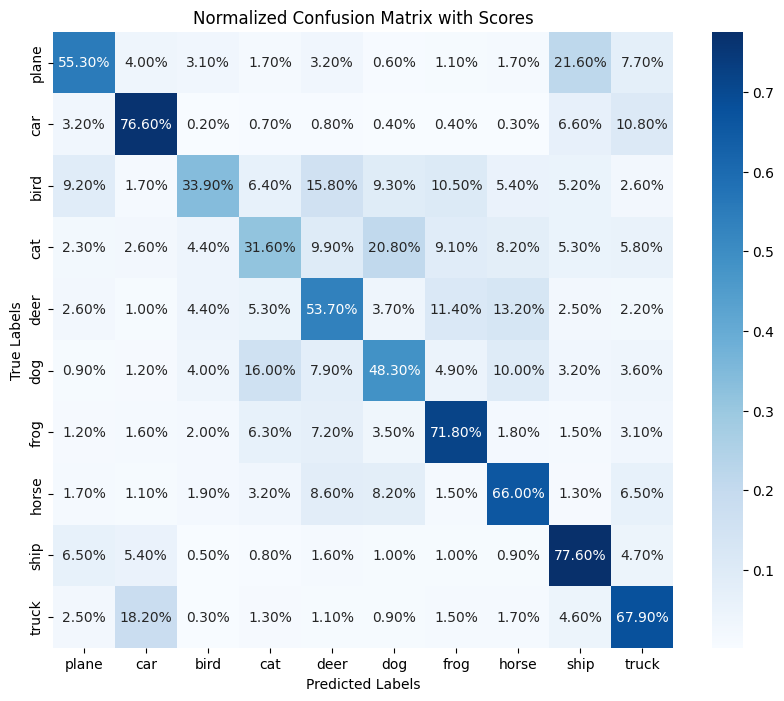

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# we already have all_preds and all_labels

# create the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# normalize the confusion matrix to show percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Normalized Confusion Matrix with Scores")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()